In [2]:

import numpy as np             
import math
import regions                                   
import pylab                                
import matplotlib                           
import matplotlib.gridspec as gridspec      
                                           
                                           
import scipy

import astropy.io.fits as fits             
                                           
from astropy.wcs import WCS                 
from astropy import units as u              

import pyspeckit                     
                                            
                                           
from spectral_cube import SpectralCube     

from reproject import reproject_interp     
from reproject.mosaicking import find_optimal_celestial_wcs 


                                            
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            
%matplotlib inline                             

matplotlib.rc('font', family='sans-serif')  
matplotlib.rc('text', usetex=True)      



# 13C16O

## Creates spectrum of file

In [29]:
path="A.Dust_Ridge_13C16O.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
print(sc_Ghz)
sc_Ghz=sc_Ghz.to(u.K)
print(sc_Ghz)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 

SpectralCube with shape=(1917, 288, 288) and unit=Jy / beam:
 n_x:    288  type_x: RA---SIN  unit_x: deg    range:   266.572800 deg:  266.603675 deg
 n_y:    288  type_y: DEC--SIN  unit_y: deg    range:   -28.608259 deg:  -28.581154 deg
 n_s:   1917  type_s: FREQ      unit_s: GHz    range:      110.084 GHz:     110.318 GHz
SpectralCube with shape=(1917, 288, 288) and unit=K:
 n_x:    288  type_x: RA---SIN  unit_x: deg    range:   266.572800 deg:  266.603675 deg
 n_y:    288  type_y: DEC--SIN  unit_y: deg    range:   -28.608259 deg:  -28.581154 deg
 n_s:   1917  type_s: FREQ      unit_s: GHz    range:      110.084 GHz:     110.318 GHz


## Gaussian profile major line

819


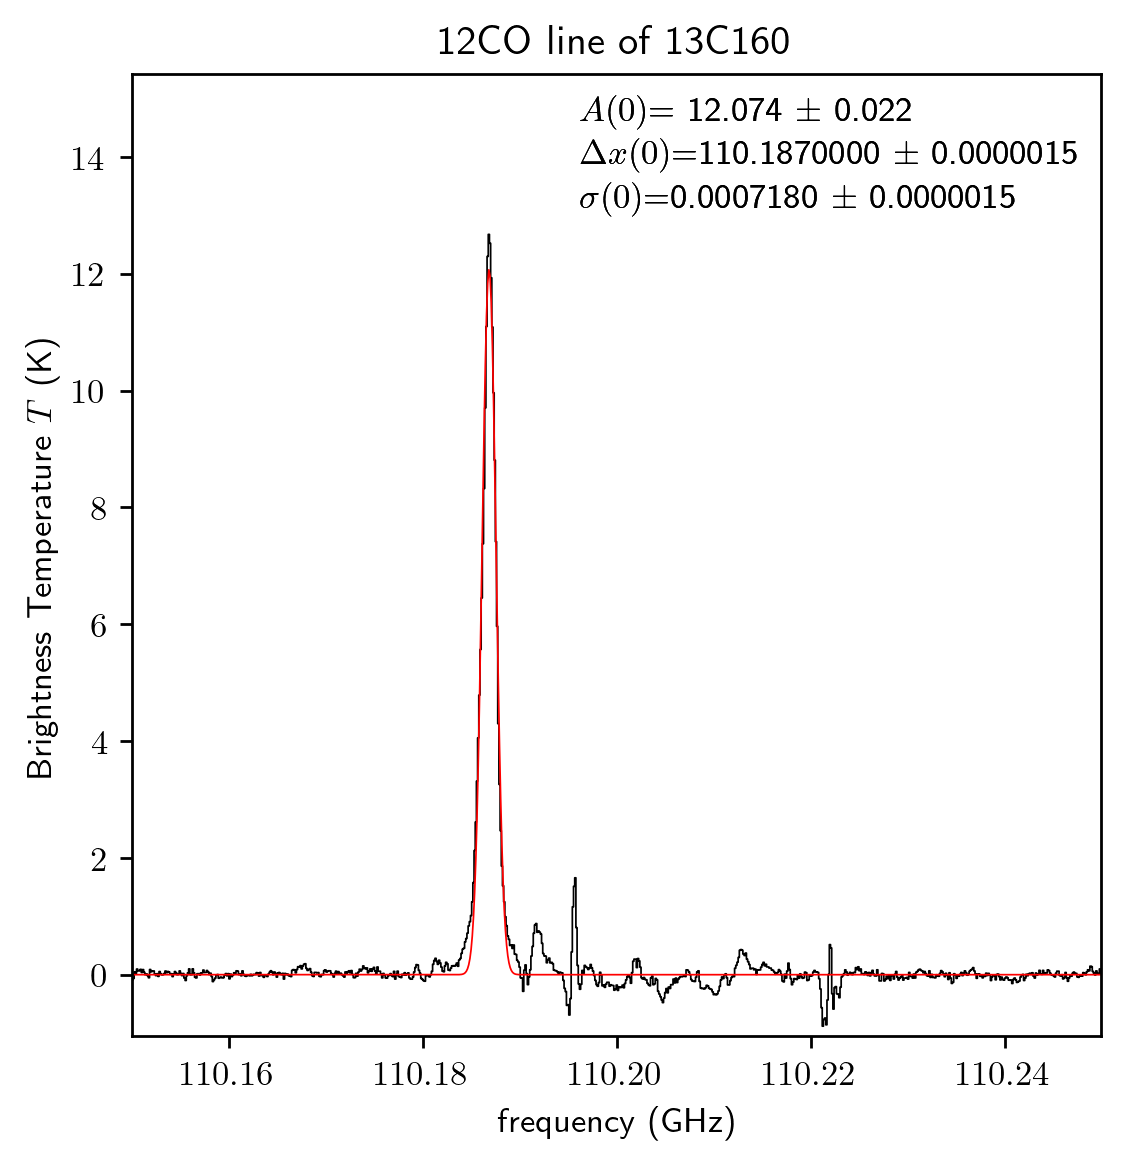

In [30]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>110.15)*(freq.value<110.25))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]
print(len(zoom_13C160))

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.16)*(zoom_freq.value<110.18))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

#print((zoom_13C160))
sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit="K")
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="12CO line of 13C160")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('13C160gaussianplot.png')
#print(sp.specfit.parinfo)

## Profile of bumps to the right

Param #0   AMPLITUDE0 =      0.51493 +/-      0.00840873 
Param #1       SHIFT0 =      110.315 +/-     6.39389e-05 
Param #2       WIDTH0 =   0.00260276 +/-     7.00215e-05   Range:   [0,inf)


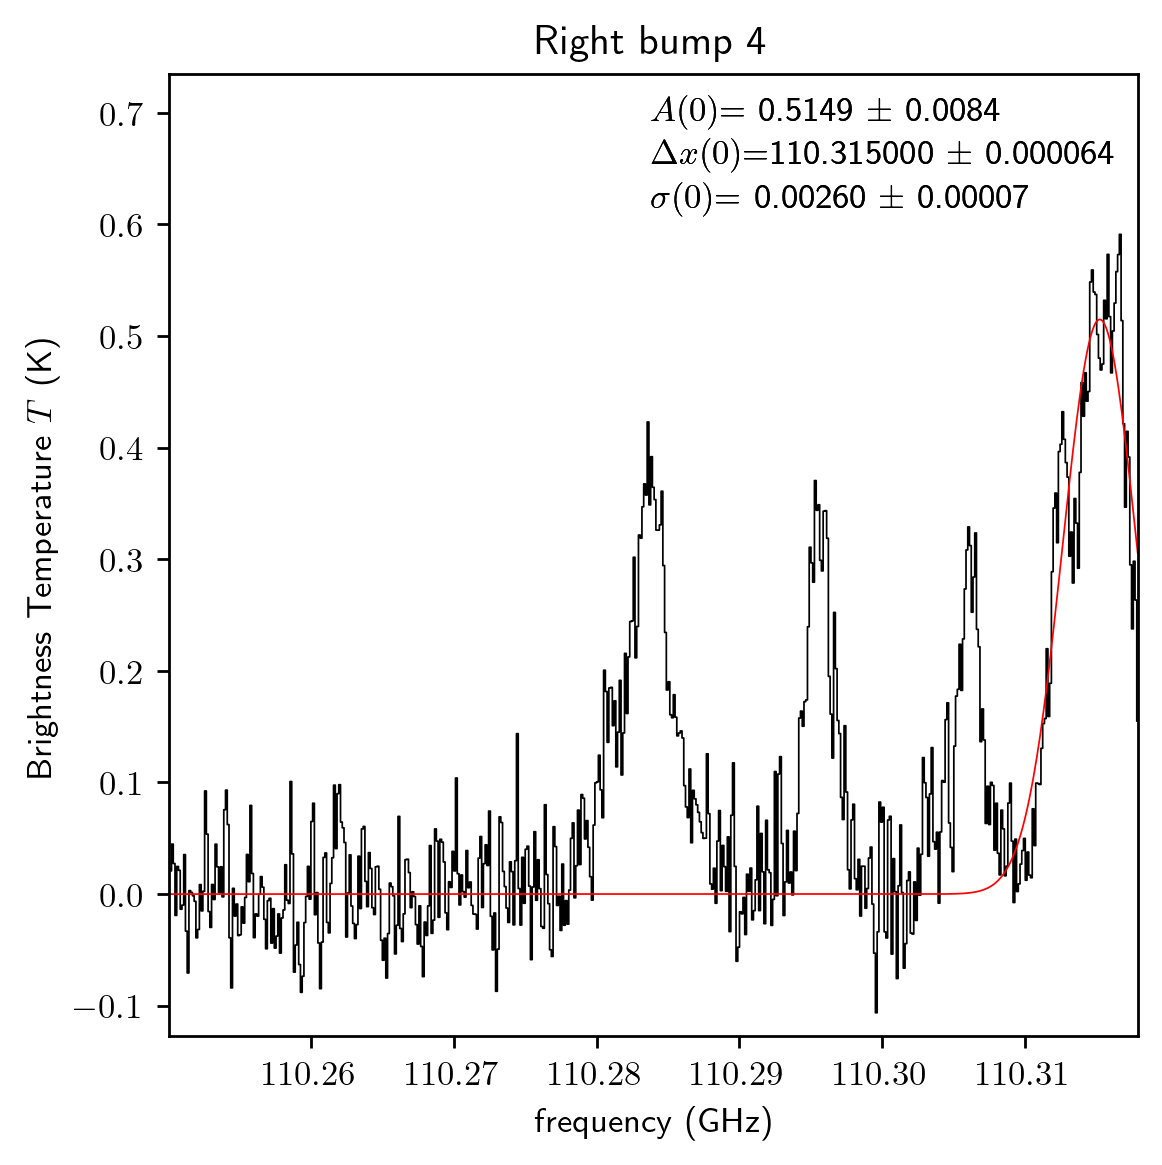

In [31]:
zoom = np.where((freq.value>110.25)*(freq.value<110.318))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.25)*(zoom_freq.value<110.27))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Right bump 4")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('rightbump4.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.264003 +/-       0.0183518 
Param #1       SHIFT0 =      110.306 +/-     8.61156e-05 
Param #2       WIDTH0 =   0.00107287 +/-     8.61173e-05   Range:   [0,inf)


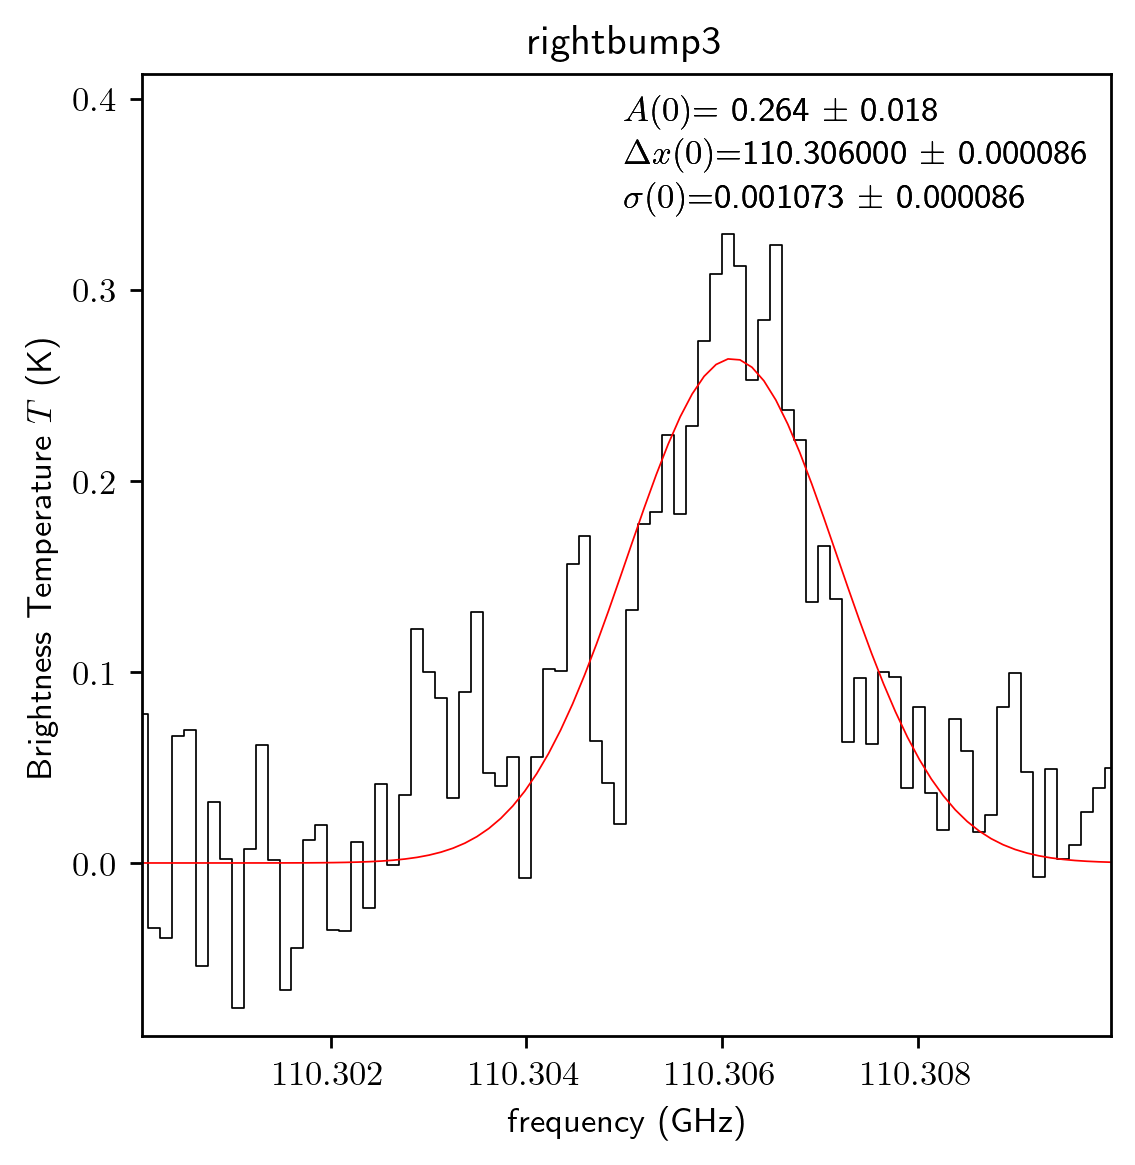

In [32]:
zoom = np.where((freq.value>110.30)*(freq.value<110.31))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.30)*(zoom_freq.value<110.305))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="rightbump3")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('rightbump3.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.330132 +/-       0.0253411 
Param #1       SHIFT0 =      110.296 +/-     8.81902e-05 
Param #2       WIDTH0 =   0.00099498 +/-     8.81902e-05   Range:   [0,inf)


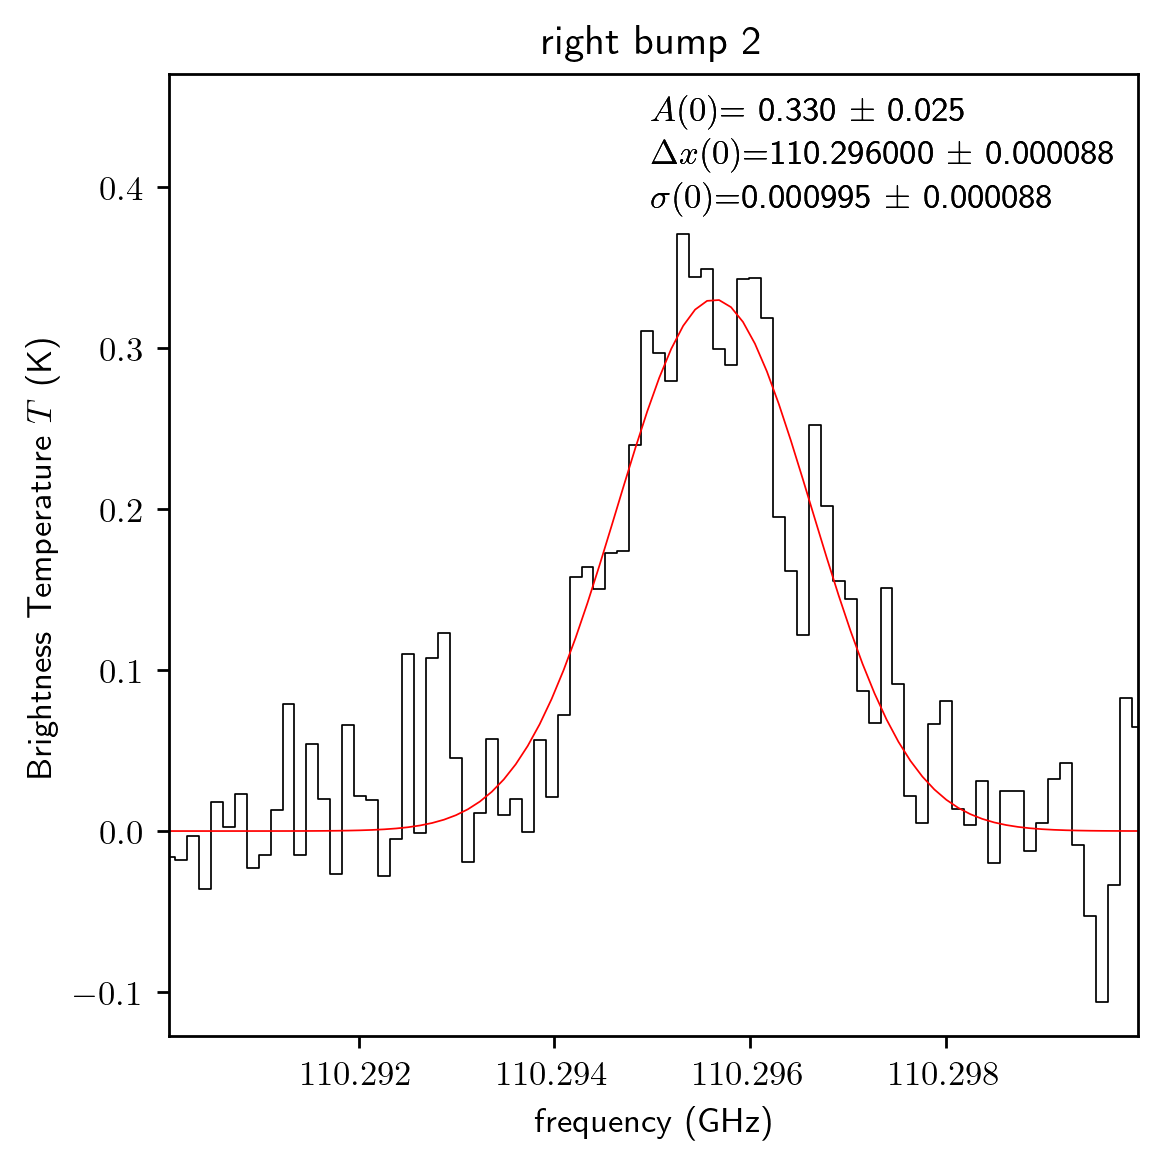

In [33]:
zoom = np.where((freq.value>110.29)*(freq.value<110.30))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.29)*(zoom_freq.value<110.295))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="right bump 2")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('rightbump2.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.321056 +/-       0.0092791 
Param #1       SHIFT0 =      110.284 +/-     6.51538e-05 
Param #2       WIDTH0 =   0.00195228 +/-     6.51538e-05   Range:   [0,inf)


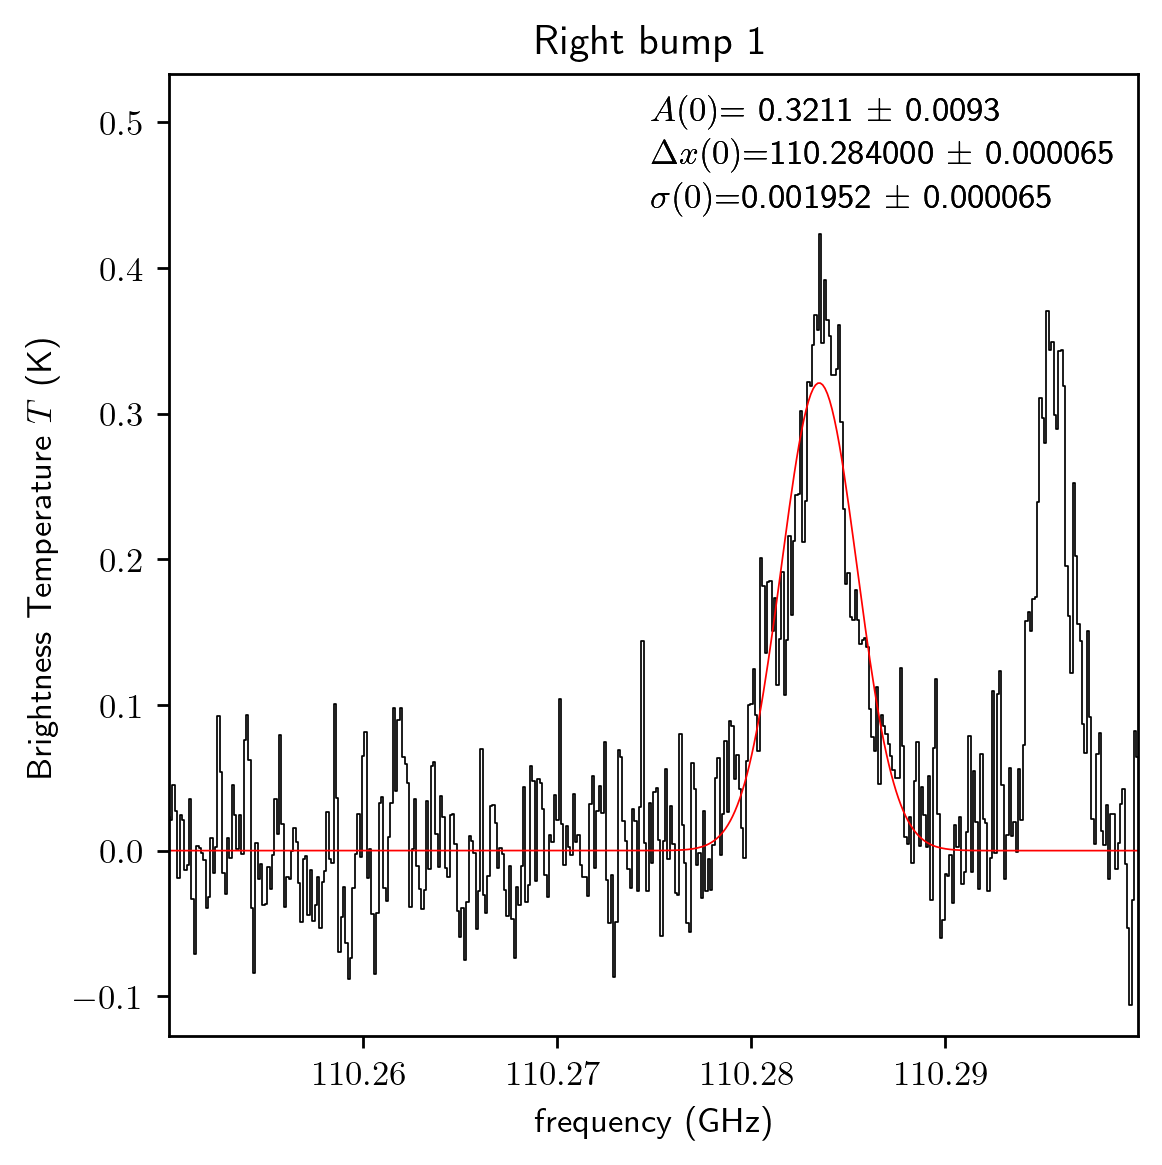

In [34]:
zoom = np.where((freq.value>110.25)*(freq.value<110.30))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.25)*(zoom_freq.value<110.27))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Right bump 1")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('rightbump1.png')
print(sp.specfit.parinfo)

## Bumps to the Left

Param #0   AMPLITUDE0 =      0.43405 +/-       0.0171794 
Param #1       SHIFT0 =      110.126 +/-     2.75548e-05 
Param #2       WIDTH0 =  0.000602927 +/-     2.75548e-05   Range:   [0,inf)


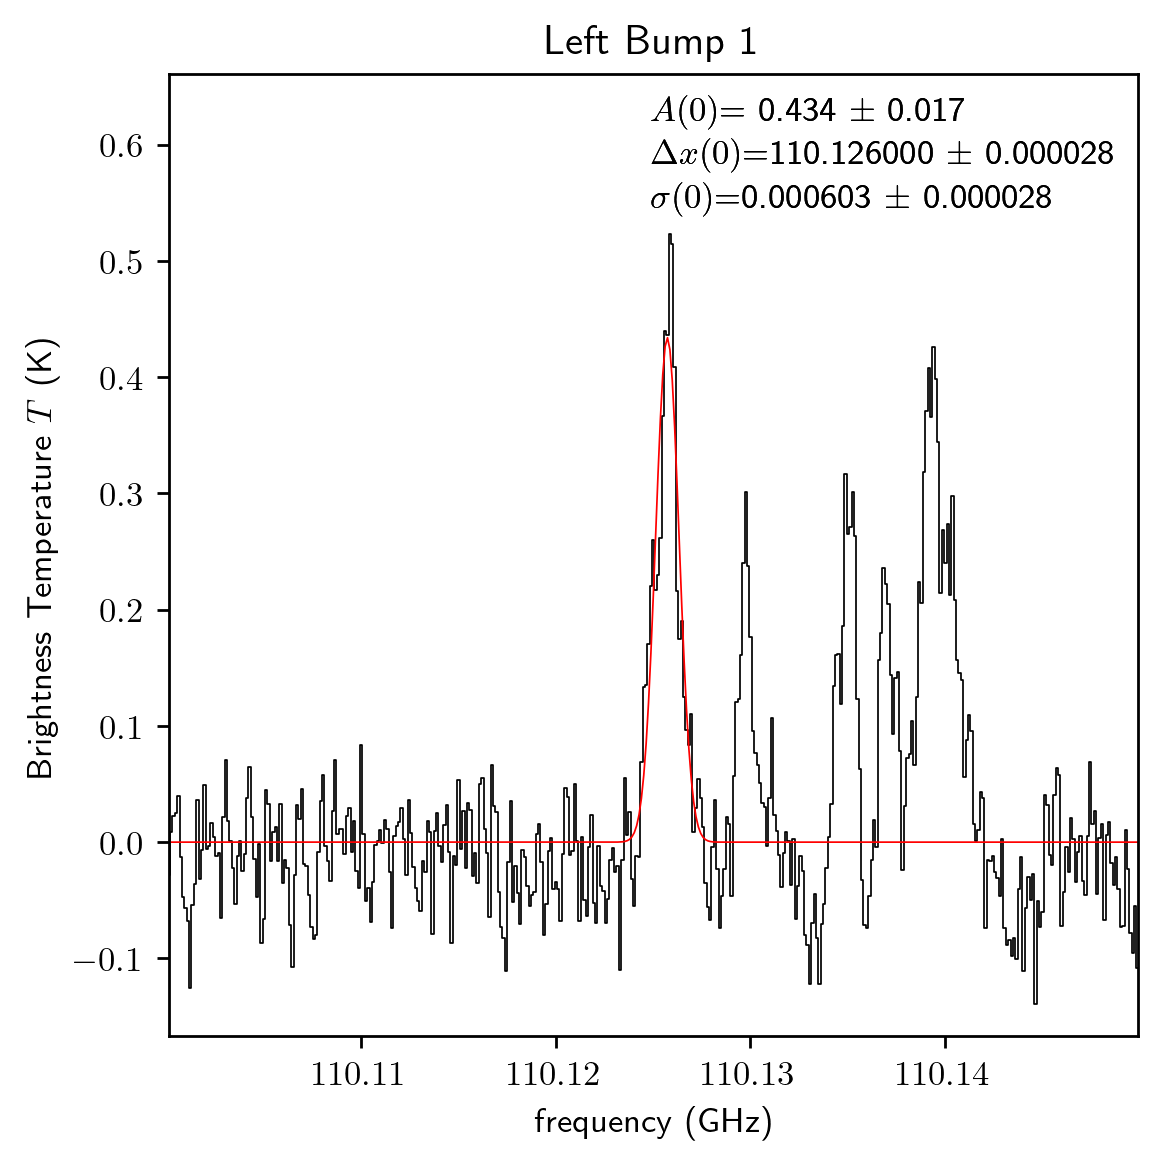

In [35]:
zoom = np.where((freq.value>110.10)*(freq.value<110.15))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.10)*(zoom_freq.value<110.11))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Left Bump 1")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('leftbump1.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.258923 +/-       0.0212968 
Param #1       SHIFT0 =       110.13 +/-     2.99986e-05 
Param #2       WIDTH0 =  0.000315857 +/-     2.99985e-05   Range:   [0,inf)


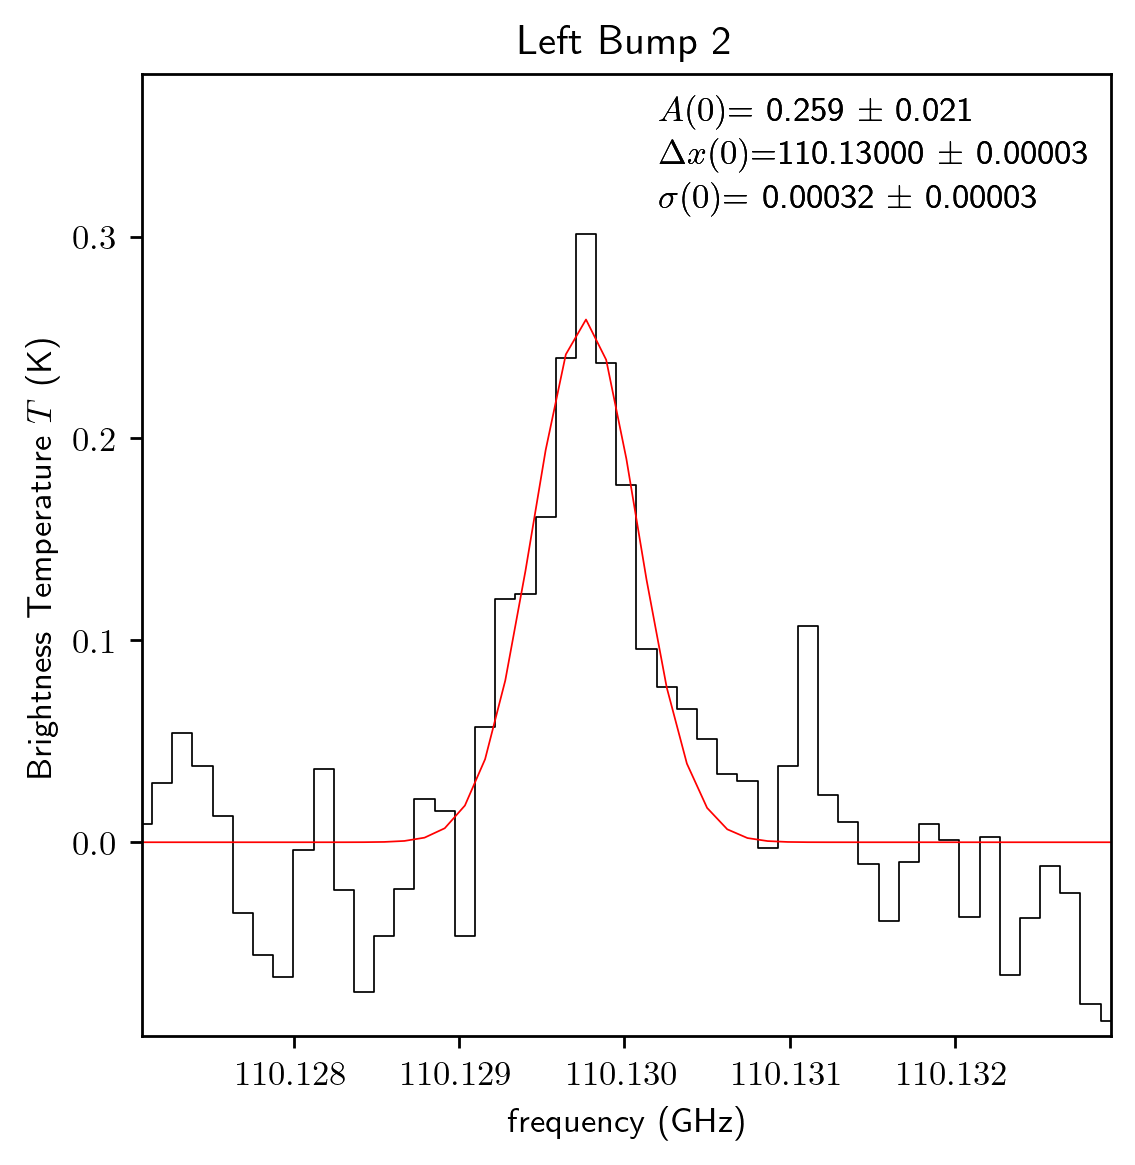

In [36]:
zoom = np.where((freq.value>110.127)*(freq.value<110.133))
zoom_out_of_bounds=np.where((freq.value>110.10)*(freq.value<110.125))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]
zoom_13C160_out_of_bounds=spectrum[zoom_out_of_bounds]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]
zoom_freq_out_of_bounds=freq[zoom_out_of_bounds]




error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.125)*(zoom_freq.value<110.13))
wheremeas_zoom_out_of_bounds=np.where((zoom_freq_out_of_bounds.value>110.11)*(zoom_freq_out_of_bounds.value<110.12))
meas = np.std(zoom_13C160_out_of_bounds[wheremeas_zoom_out_of_bounds])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Left Bump 2")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('leftbump2.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.300489 +/-       0.0194544 
Param #1       SHIFT0 =      110.135 +/-     2.82968e-05 
Param #2       WIDTH0 =  0.000378517 +/-     2.82967e-05   Range:   [0,inf)


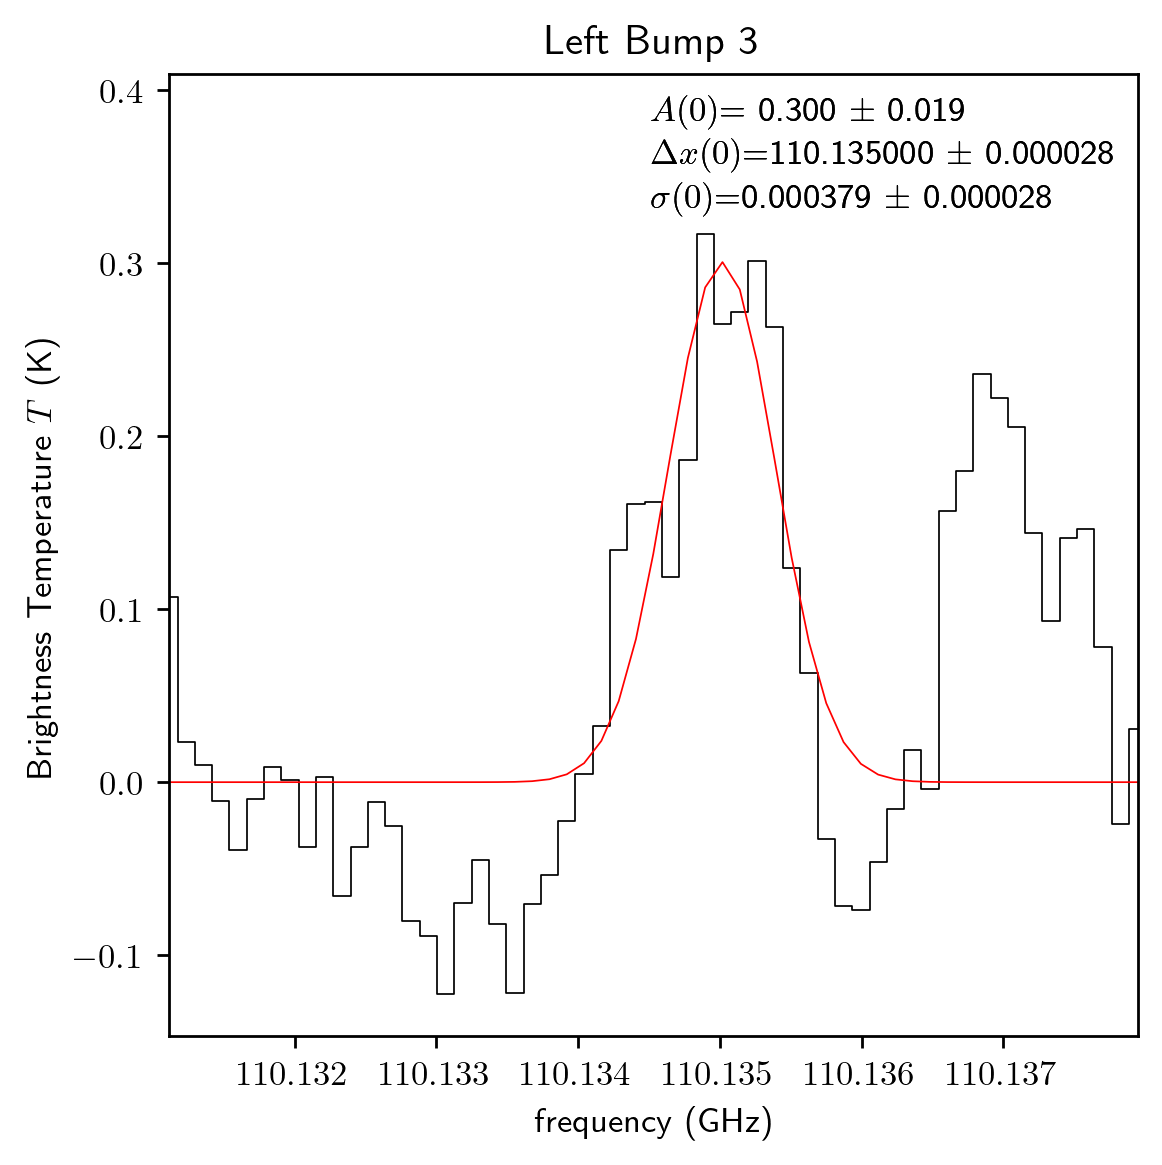

In [37]:
zoom = np.where((freq.value>110.131)*(freq.value<110.138))
zoom_out_of_bounds=np.where((freq.value>110.10)*(freq.value<110.125))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]
zoom_13C160_out_of_bounds=spectrum[zoom_out_of_bounds]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]
zoom_freq_out_of_bounds=freq[zoom_out_of_bounds]




error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.125)*(zoom_freq.value<110.13))
wheremeas_zoom_out_of_bounds=np.where((zoom_freq_out_of_bounds.value>110.11)*(zoom_freq_out_of_bounds.value<110.12))
meas = np.std(zoom_13C160_out_of_bounds[wheremeas_zoom_out_of_bounds])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Left Bump 3")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('leftbump3.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.218925 +/-       0.0198539 
Param #1       SHIFT0 =      110.137 +/-     3.80697e-05 
Param #2       WIDTH0 =   0.00036359 +/-     3.80976e-05   Range:   [0,inf)


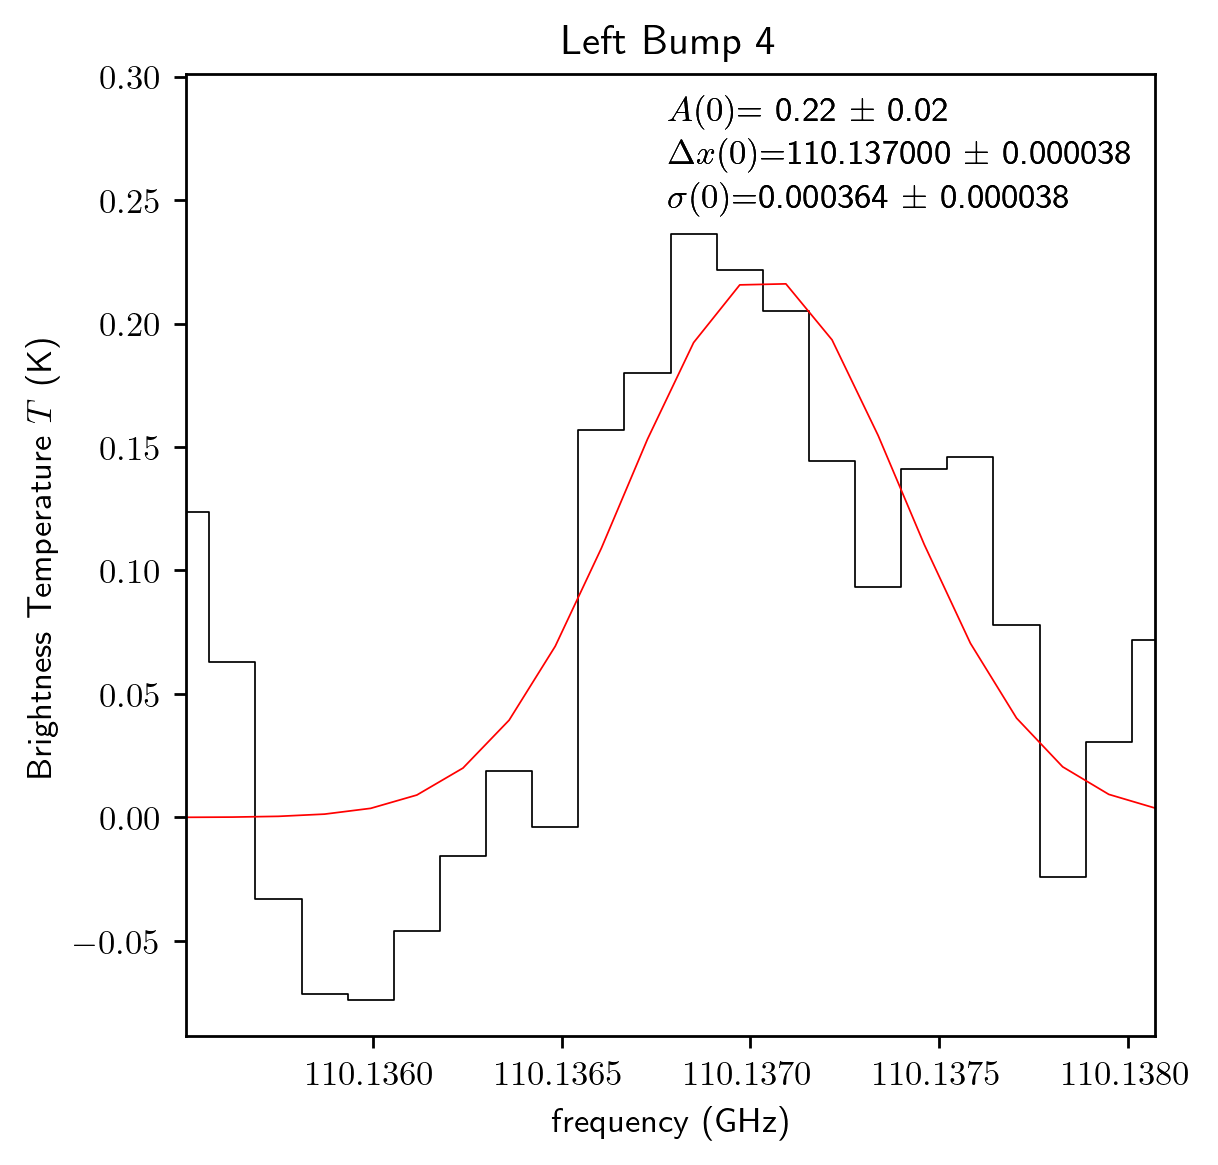

In [38]:
zoom = np.where((freq.value>110.1355)*(freq.value<110.1381))
zoom_out_of_bounds=np.where((freq.value>110.10)*(freq.value<110.125))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]
zoom_13C160_out_of_bounds=spectrum[zoom_out_of_bounds]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]
zoom_freq_out_of_bounds=freq[zoom_out_of_bounds]




error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.125)*(zoom_freq.value<110.13))
wheremeas_zoom_out_of_bounds=np.where((zoom_freq_out_of_bounds.value>110.11)*(zoom_freq_out_of_bounds.value<110.12))
meas = np.std(zoom_13C160_out_of_bounds[wheremeas_zoom_out_of_bounds])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Left Bump 4")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('leftbump4.png')
print(sp.specfit.parinfo)

Param #0   AMPLITUDE0 =     0.339087 +/-       0.0121984 
Param #1       SHIFT0 =       110.14 +/-     3.99919e-05 
Param #2       WIDTH0 =  0.000962739 +/-     3.99919e-05   Range:   [0,inf)


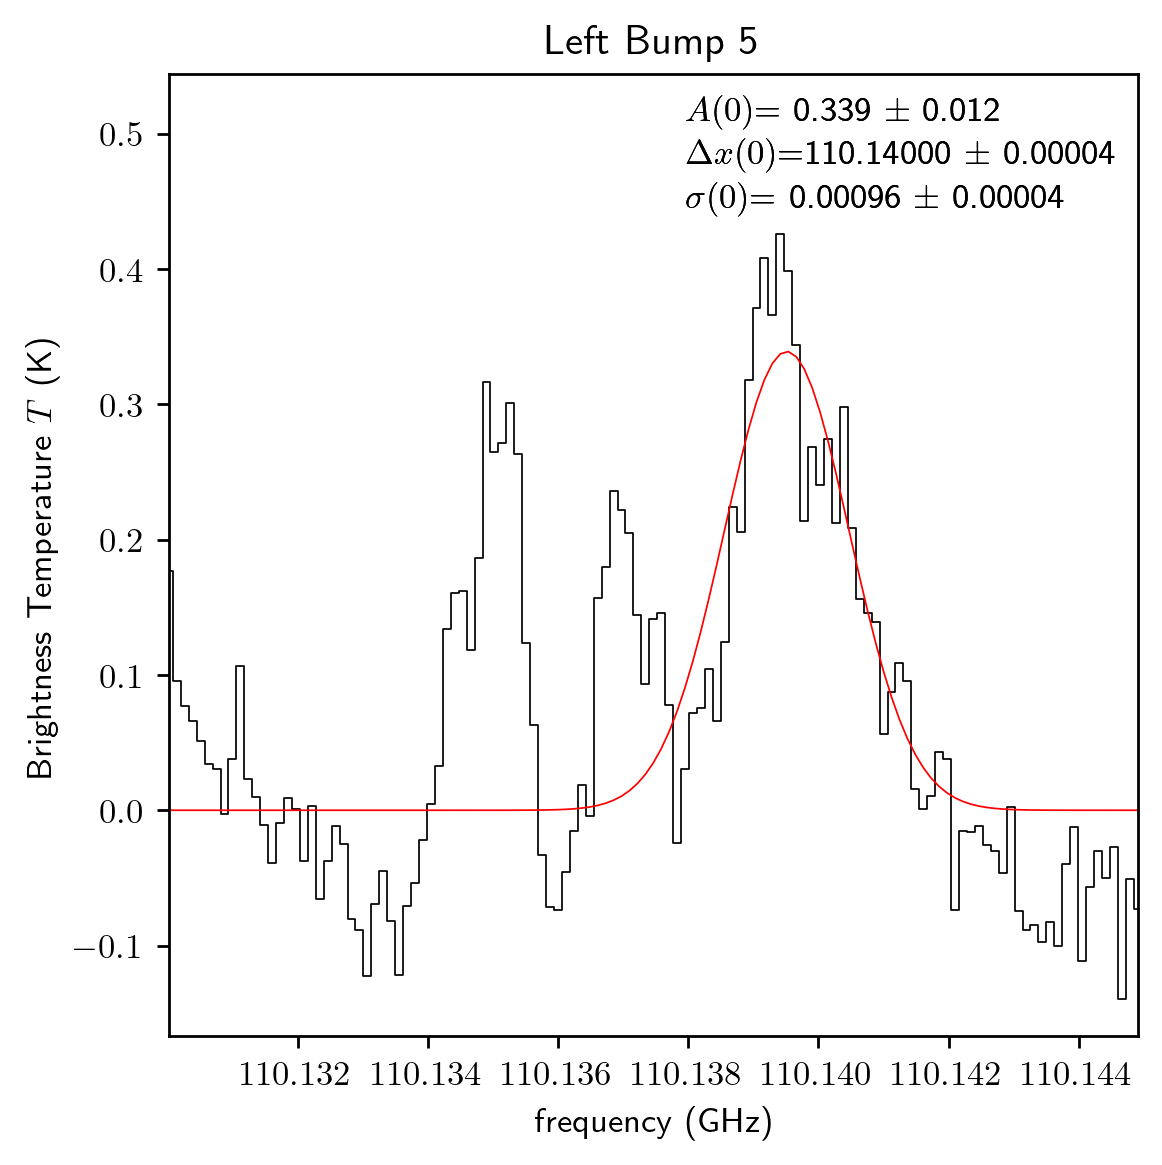

In [39]:
zoom = np.where((freq.value>110.130)*(freq.value<110.145))
zoom_out_of_bounds=np.where((freq.value>110.10)*(freq.value<110.125))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]
zoom_13C160_out_of_bounds=spectrum[zoom_out_of_bounds]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]
zoom_freq_out_of_bounds=freq[zoom_out_of_bounds]




error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.125)*(zoom_freq.value<110.13))
wheremeas_zoom_out_of_bounds=np.where((zoom_freq_out_of_bounds.value>110.11)*(zoom_freq_out_of_bounds.value<110.12))
meas = np.std(zoom_13C160_out_of_bounds[wheremeas_zoom_out_of_bounds])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1), title="Left Bump 5")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('leftbump5.png')
print(sp.specfit.parinfo)

# 12C18O

In [2]:
## importing packages for convenience

import numpy as np             
import math
import regions                                   
import pylab                                
import matplotlib                           
import matplotlib.gridspec as gridspec      
                                           
                                           
import scipy

import astropy.io.fits as fits             
                                           
from astropy.wcs import WCS                 
from astropy import units as u              

import pyspeckit                     
                                            
                                           
from spectral_cube import SpectralCube     

from reproject import reproject_interp     
from reproject.mosaicking import find_optimal_celestial_wcs 


                                            
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            
%matplotlib inline                             

matplotlib.rc('font', family='sans-serif')  
matplotlib.rc('text', usetex=True)      



## Creates spectrum of file

In [3]:

path="A.Dust_Ridge_12C18O.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
sc_Ghz=sc_Ghz.to(u.K)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 


## Plotting spectrum

(-1.0, 3.0)

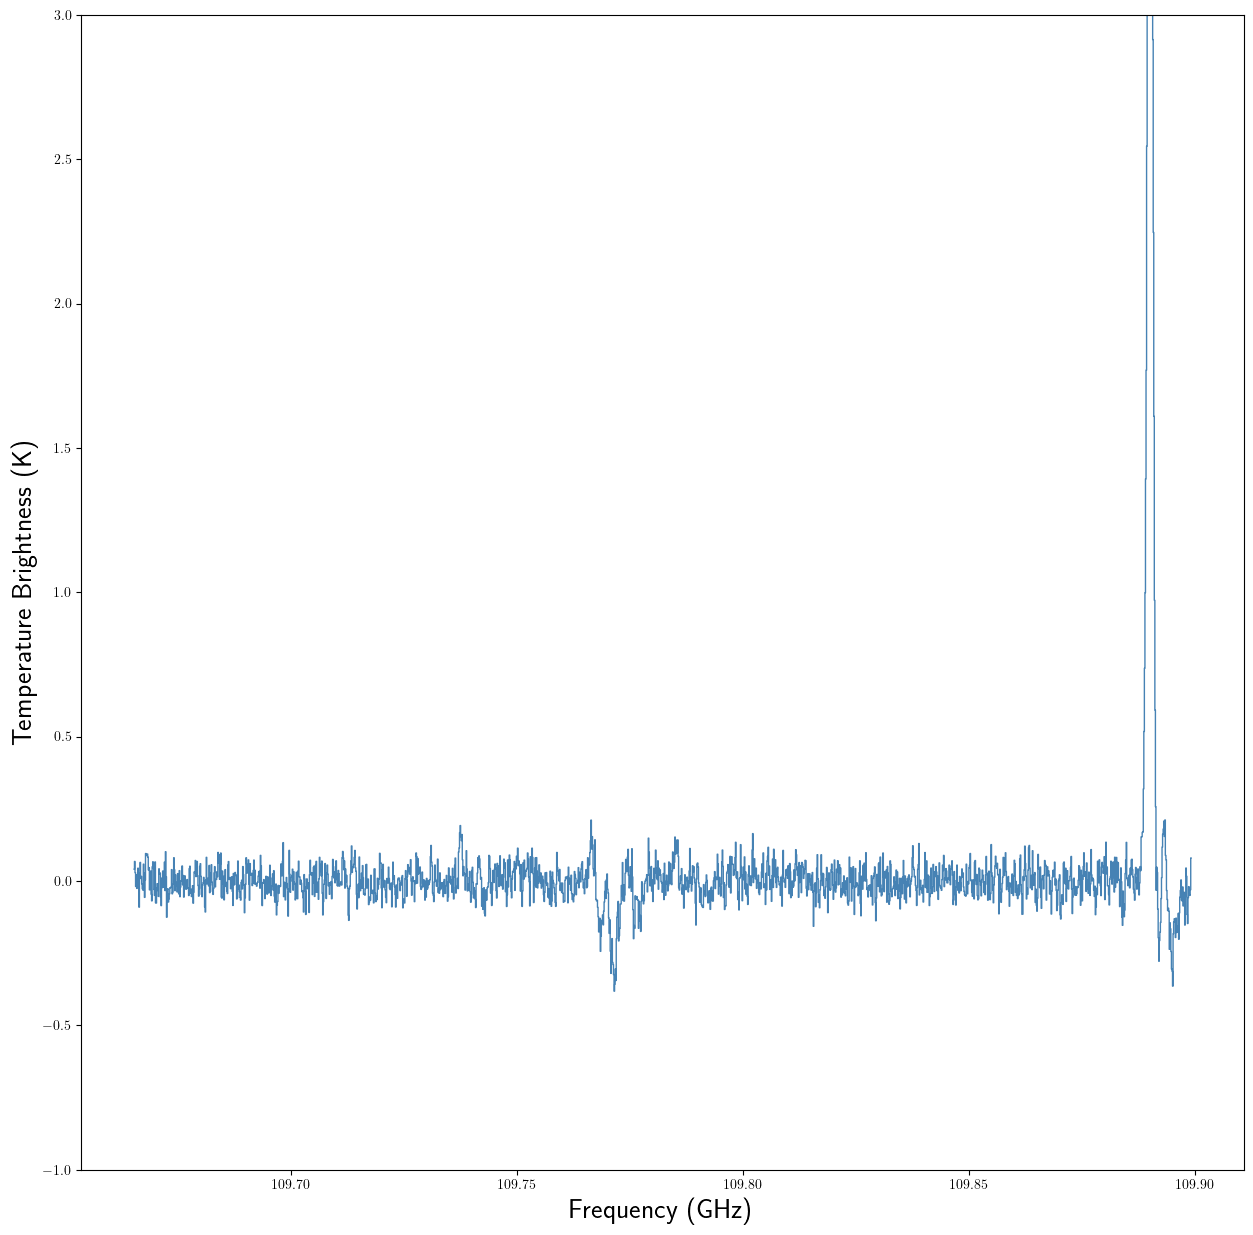

In [8]:
fig1=pylab.figure(1,figsize=(15,15))
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=20)
pylab.ylabel("Temperature Brightness (K)",fontsize=20)
pylab.ylim(-1,3)

## Gaussian profile of spectrum

Param #0   AMPLITUDE0 =      5.53416 +/-       0.0242508 
Param #1       SHIFT0 =       109.89 +/-     2.83318e-06 
Param #2       WIDTH0 =  0.000559924 +/-     2.83318e-06   Range:   [0,inf)


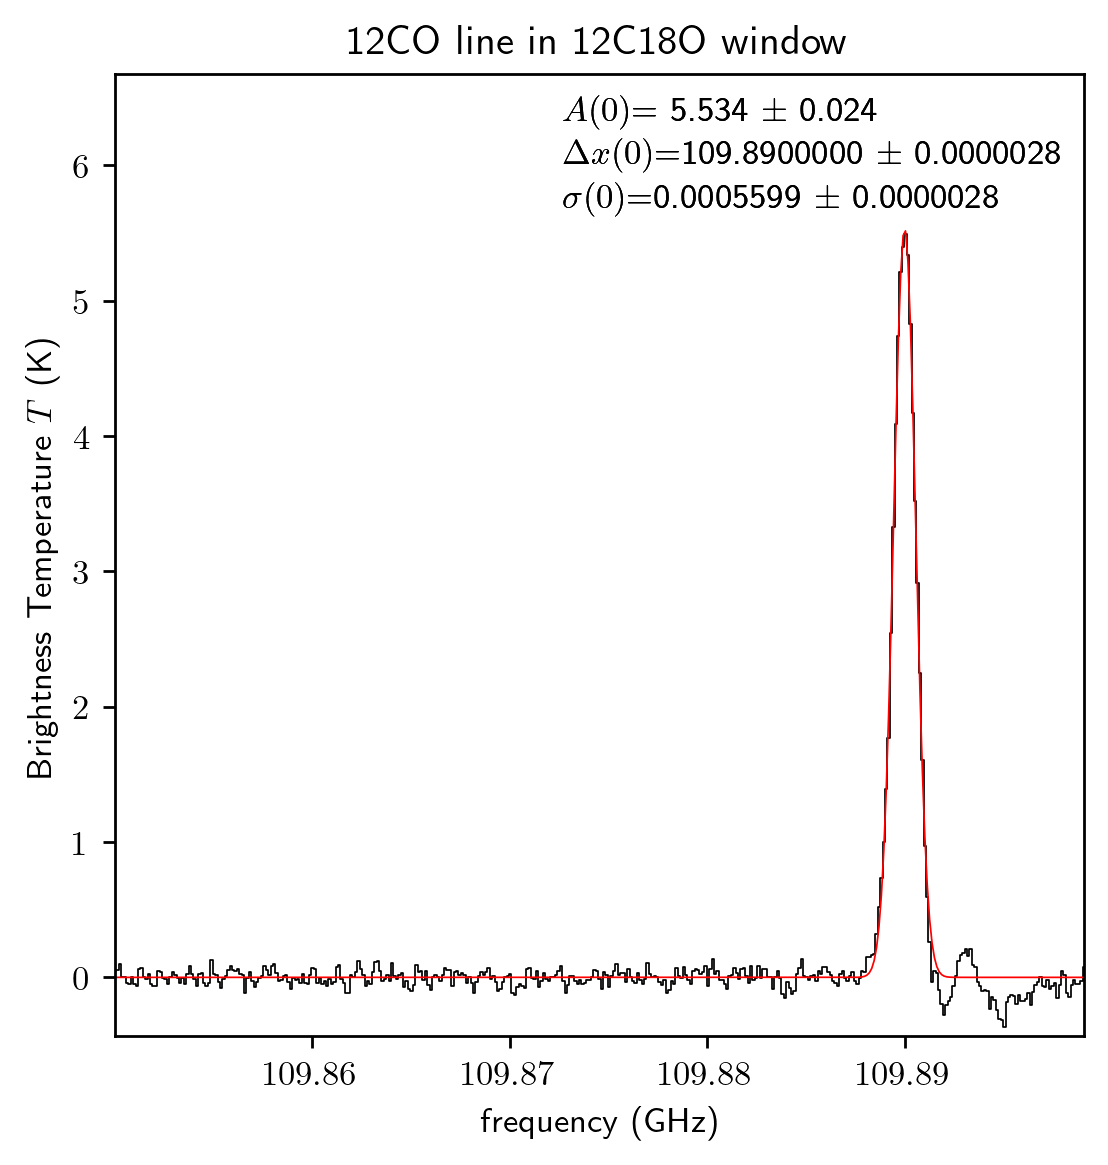

In [6]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>109.85)*(freq.value<109.90))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>109.86)*(zoom_freq.value<109.87))
meas = np.std(zoom_12C180[wheremeas])  
error = error + meas

sp = psk.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="12CO line in 12C18O window")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C180gaussianprofileplot.png')
print(sp.specfit.parinfo)

# 12C16O

In [13]:
## importing packages for convenience

import numpy as np             
import math
import regions                                   
import pylab                                
import matplotlib                           
import matplotlib.gridspec as gridspec      
                                           
                                           
import scipy

import astropy.io.fits as fits             
                                           
from astropy.wcs import WCS                 
from astropy import units as u              

import pyspeckit                     
                                            
                                           
from spectral_cube import SpectralCube     

from reproject import reproject_interp     
from reproject.mosaicking import find_optimal_celestial_wcs 


                                            
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            
%matplotlib inline                             

matplotlib.rc('font', family='sans-serif')  
matplotlib.rc('text', usetex=True)      



## Creates spectrum of file

In [3]:
path="B.Dust_Ridge_12C16O_1-0.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube`
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
sc_Ghz=sc_Ghz.to(u.K)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 

## Plotting Spectrum for the cube towards brightest source

Text(0, 0.5, 'Temperature Brightness (K)')

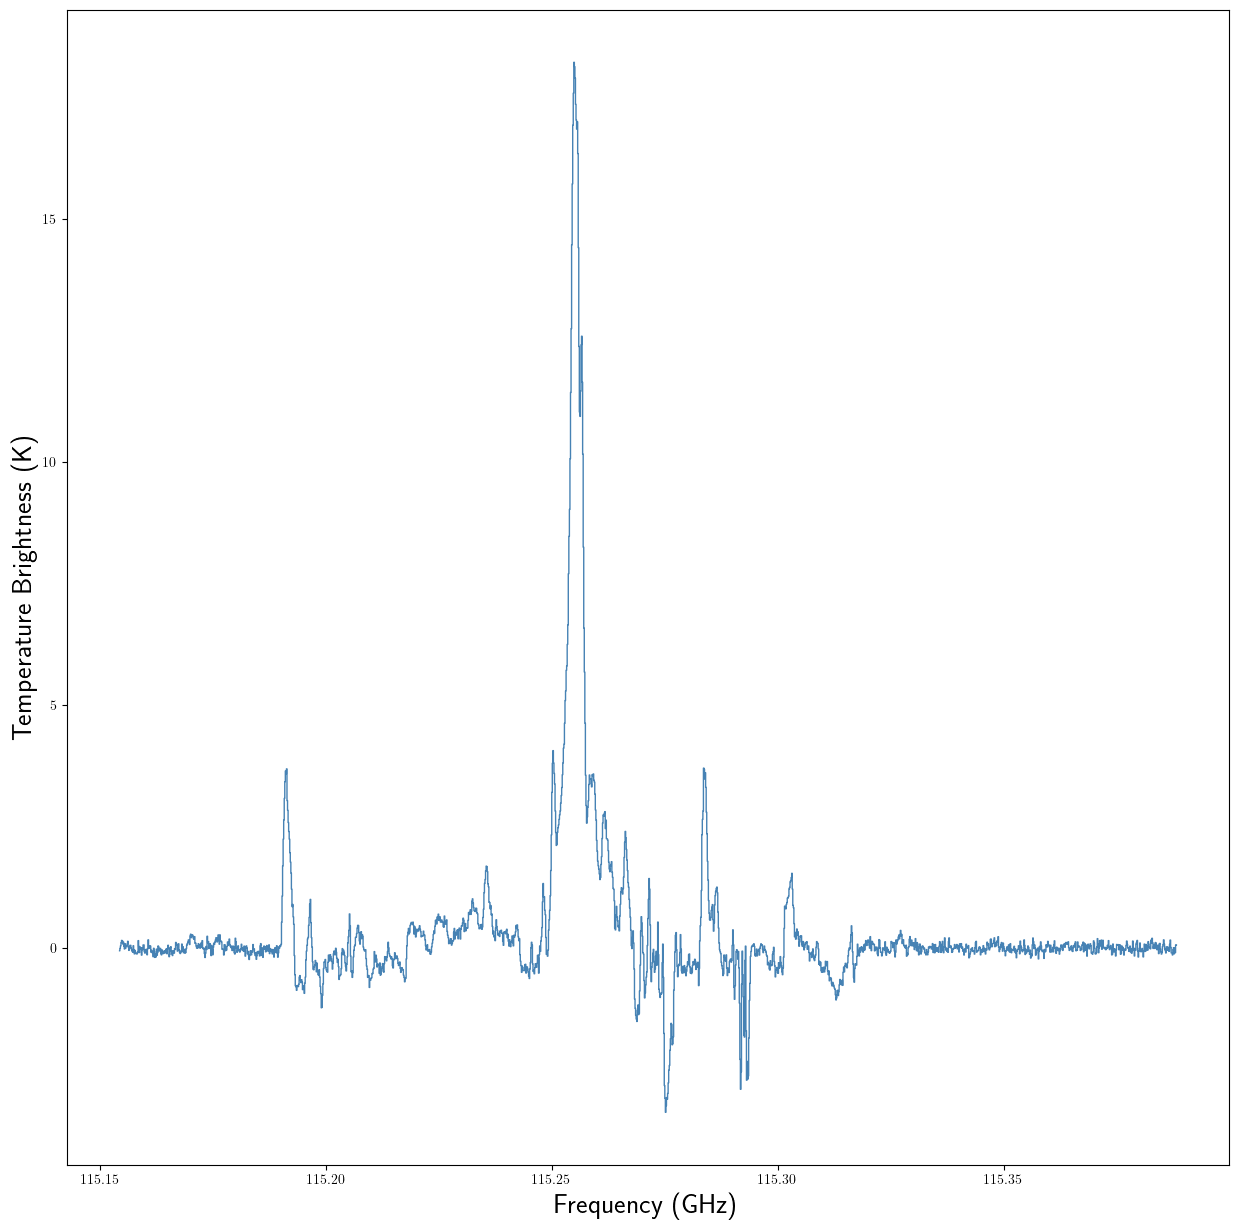

In [11]:
fig1=pylab.figure(1,figsize=(15,15))
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=20)
pylab.ylabel("Temperature Brightness (K)",fontsize=20)
#pylab.ylim(-1,3)

## Plotting Gaussian profile

Param #0   AMPLITUDE0 =      16.2129 +/-        0.021652 
Param #1       SHIFT0 =      115.255 +/-     2.38079e-06 
Param #2       WIDTH0 =   0.00154387 +/-     2.38079e-06   Range:   [0,inf)


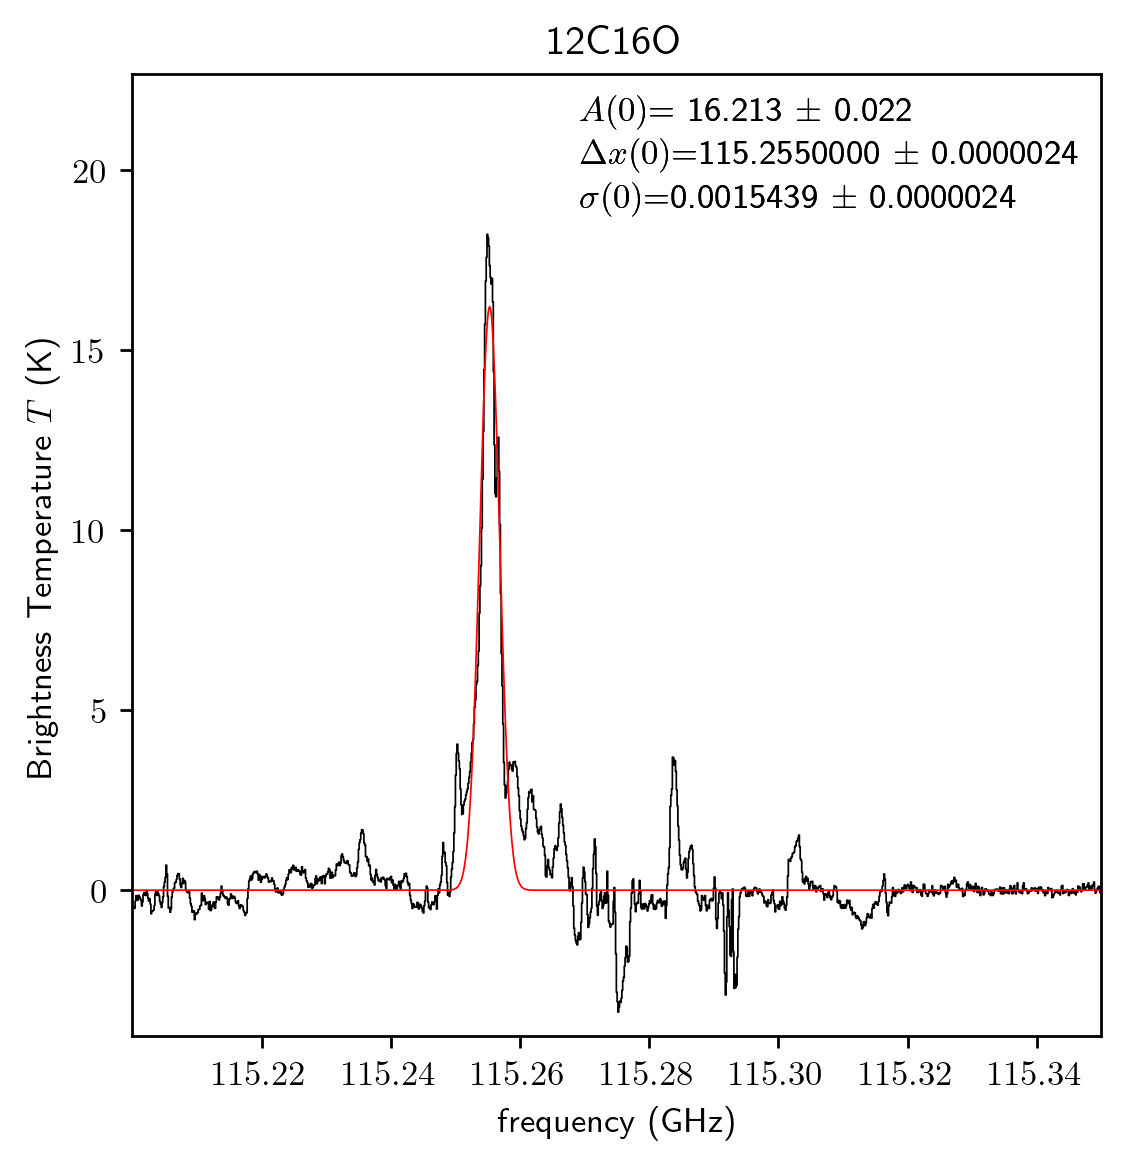

In [17]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>115.20)*(freq.value<115.35))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>115.33)*(zoom_freq.value<115.35))
meas = np.std(zoom_12C180[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="12C16O")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C16Ogaussianprofileplot.png')
print(sp.specfit.parinfo)

# 12C17O

## Creates Spectrum of file

In [36]:
path="B.Dust_Ridge_12C17O.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube`
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
sc_Ghz=sc_Ghz.to(u.K)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 
print(sc_Ghz)

SpectralCube with shape=(1917, 350, 350) and unit=K:
 n_x:    350  type_x: RA---SIN  unit_x: deg    range:   266.572768 deg:  266.603687 deg
 n_y:    350  type_y: DEC--SIN  unit_y: deg    range:   -28.608270 deg:  -28.581126 deg
 n_s:   1917  type_s: FREQ      unit_s: GHz    range:      112.242 GHz:     112.476 GHz


## Plots spectrum

Text(0, 0.5, 'Temperature Brightness (K)')

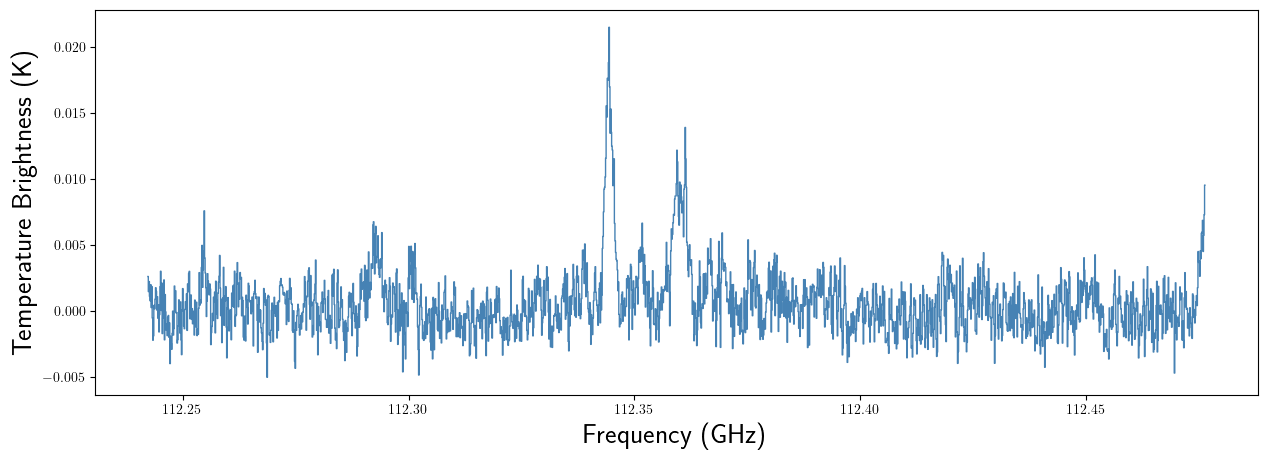

In [37]:
import regions

region_str = "circle[[175pix, 175pix], 100pix], ICRS" 
#cropped down to 100pix because full image wouldn't produce spectra since max was an
#edge case found using carta 
region = regions.Regions.parse(region_str,format='crtf')
crop = sc.subcube_from_regions(region) 

z,x,y=pylab.where(crop.hdu.data==np.nanmax(crop.hdu.data))

subcube=crop.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]
spectrum = np.average(subcube,axis=(1,2)) 

#plot figure
fig1=pylab.figure(1,figsize=(15,5))
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=20)
pylab.ylabel("Temperature Brightness (K)", fontsize=20)

#pylab.ylim(-1,3)

## Gaussian Profile

Param #0   AMPLITUDE0 =    0.0177722 +/-     0.000568744 
Param #1       SHIFT0 =      112.344 +/-     3.24436e-05 
Param #2       WIDTH0 =  0.000877982 +/-     3.24436e-05   Range:   [0,inf)


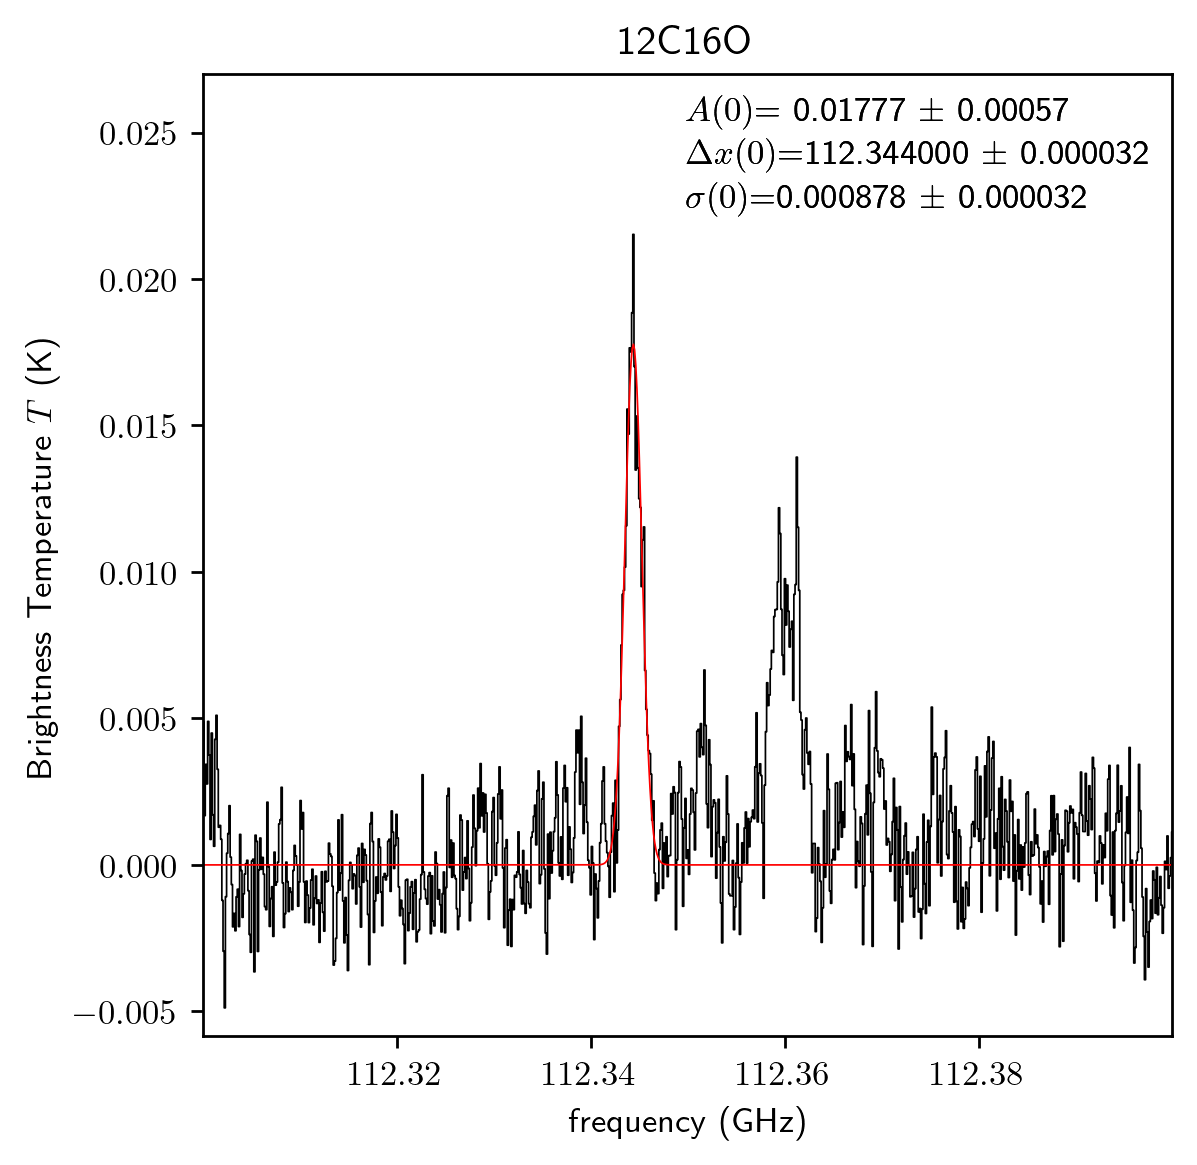

In [38]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>112.30)*(freq.value<112.4))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>112.30)*(zoom_freq.value<112.33))
meas = np.std(zoom_12C180[wheremeas])  
error = error + meas

sp = pyspeckit.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="12C16O")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C16Ogaussianprofileplot.png')
print(sp.specfit.parinfo)